In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [3]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [5]:
model = LogisticRegression(solver = 'liblinear', random_state = 0 )

In [6]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [7]:
model = LogisticRegression(solver = 'liblinear', random_state = 0 ).fit(x, y)

In [8]:
model.classes_

array([0, 1])

In [9]:
model.intercept_

array([1.29366358])

In [10]:
model.coef_

array([[-0.31888524]])

In [11]:
model.predict_proba(x)

array([[0.21523336, 0.78476664],
       [0.2739291 , 0.7260709 ],
       [0.34166277, 0.65833723],
       [0.41653649, 0.58346351],
       [0.49546947, 0.50453053],
       [0.57462894, 0.42537106],
       [0.65013846, 0.34986154],
       [0.71880326, 0.28119674],
       [0.77858137, 0.22141863],
       [0.82868038, 0.17131962]])

In [12]:
model.predict(x)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [13]:
model.score(x,y)

0.9

In [14]:
confusion_matrix(y, model.predict(x))


array([[4, 0],
       [1, 5]])

In [15]:
cm = confusion_matrix(y, model.predict(x))

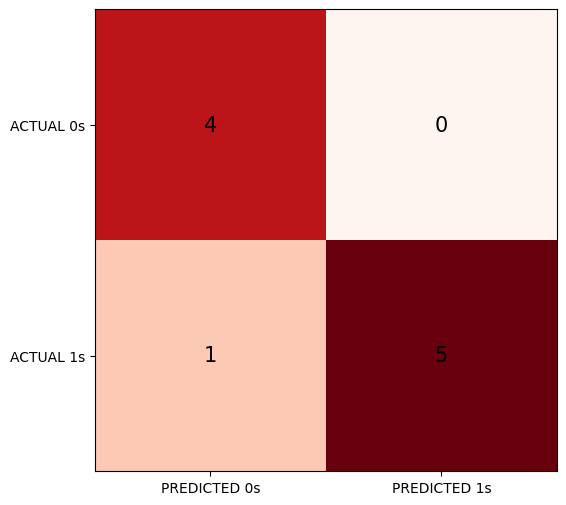

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
cmap = plt.get_cmap('Reds')
ax.imshow(cm,  cmap=cmap)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('PREDICTED 0s','PREDICTED 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('ACTUAL 0s','ACTUAL 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i, cm[i,j], ha='center', va='center',size=15)

In [17]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10



In [18]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
x, y = load_digits(return_X_y=True)

In [21]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [23]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

In [24]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [25]:
x_test = scaler.transform(x_test)

In [26]:
y_pred = model.predict(x_test)

In [27]:
model.score(x_train, y_train)
model.score(x_test, y_test)

0.9416666666666667

In [28]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

